In [1]:
import re
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Bio import SeqIO, Entrez
import py3Dmol

from dotenv import load_dotenv
env_file = '/home/yuan/bio/bio_omics/src/.env'
load_dotenv(dotenv_path = env_file)

%load_ext autoreload
%autoreload 2

src_dir = os.path.dirname(os.getcwd())
print('src direcotry is ', src_dir)
bioomics_dir = '/home/yuan/bio/bio_omics/src'
for _dir in (src_dir, bioomics_dir):
    if _dir not in sys.path:
        sys.path.append(_dir)
print(sys.path)

src direcotry is  /home/yuan/bio/predict_antibody
['/home/yuan/bio/localcolabfold/localcolabfold/colabfold-conda/lib/python310.zip', '/home/yuan/bio/localcolabfold/localcolabfold/colabfold-conda/lib/python3.10', '/home/yuan/bio/localcolabfold/localcolabfold/colabfold-conda/lib/python3.10/lib-dynload', '', '/home/yuan/bio/localcolabfold/localcolabfold/colabfold-conda/lib/python3.10/site-packages', '/home/yuan/bio/predict_antibody', '/home/yuan/bio/bio_omics/src']


In [2]:
from bioomics import QueryComplex, DistanceAnalyze, DistanceProcess
from layout import Layout
from plot_predict import PlotPredict
from load_data import LoadData

## pLDDT

In [23]:
adf = LoadData.plddt()
adf.head()

pdb 8737
chains 29089


,chain_id,ranking,predictor,avg_plddt,relative_pkl,relative_pdb,predict_id,allele_name,specie,gene_name,...,pro_id,chain_seq,pro_len,release_date,structure_method,resolution,avg_bfactor,relative_faa,chain_pdb,pdb_group
0,120L_0_A_0,2.0,alphafold2,96.8070,chain_plddt/12/120L/120L_0_A_0/120L_0_A_0_unre...,chain_alphafold/12/120L/120L_0_A_0/120L_0_A_0_...,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,120L_0_A_0,4.0,alphafold2,95.7065,chain_plddt/12/120L/120L_0_A_0/120L_0_A_0_unre...,chain_alphafold/12/120L/120L_0_A_0/120L_0_A_0_...,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,120L_0_A_0,1.0,alphafold2,96.8792,chain_plddt/12/120L/120L_0_A_0/120L_0_A_0_unre...,chain_alphafold/12/120L/120L_0_A_0/120L_0_A_0_...,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,120L_0_A_0,3.0,alphafold2,96.2385,chain_plddt/12/120L/120L_0_A_0/120L_0_A_0_unre...,chain_alphafold/12/120L/120L_0_A_0/120L_0_A_0_...,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,120L_0_A_0,4.0,alphafold2,95.7065,chain_plddt/12/120L/120L_0_A_0/120L_0_A_0_rela...,chain_alphafold/12/120L/120L_0_A_0/120L_0_A_0_...,5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


figure size: 11.4 x 6 cm


<Axes: xlabel='Average pLDDT', ylabel='Chain '>

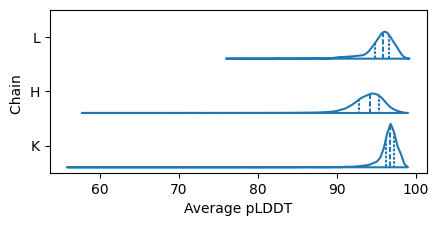

In [24]:
# model confidence
args = {'width_level':2, 'height':6}
fig, ax = Layout(args).one()

PlotPredict(df).violin_plddt(ax)

## RMSD

In [96]:
query = "select * from chain_rmsd where rmsd is not null"
df = QueryComplex().list_data(query, True)
df.head()

,pdb_id,chain_id,rmsd,chain_status,native_pdb,model_pdb
0,120L,120L_0_A_0,0.590259,Raw,meta_chain_pdb/12/120L/120L_0_A_0.pdb,chain_alphafold/12/120L/120L_0_A_0/120L_0_A_0_...
1,120L,120L_0_A_0,0.803375,Raw,meta_chain_pdb/12/120L/120L_0_A_0.pdb,chain_alphafold/12/120L/120L_0_A_0/120L_0_A_0_...
2,120L,120L_0_A_0,0.923900,Raw,meta_chain_pdb/12/120L/120L_0_A_0.pdb,chain_alphafold/12/120L/120L_0_A_0/120L_0_A_0_...
3,120L,120L_0_A_0,0.463741,Raw,meta_chain_pdb/12/120L/120L_0_A_0.pdb,chain_alphafold/12/120L/120L_0_A_0/120L_0_A_0_...
4,120L,120L_0_A_0,0.520793,Raw,meta_chain_pdb/12/120L/120L_0_A_0.pdb,chain_alphafold/12/120L/120L_0_A_0/120L_0_A_0_...


figure size: 11.4 x 7 cm


<Axes: xlabel='PDB Post-processing', ylabel='Log RMSD'>

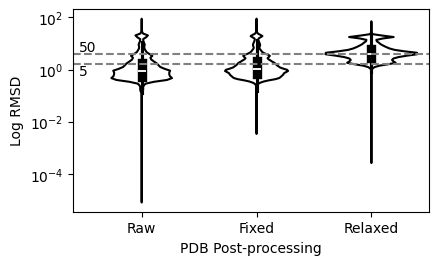

In [106]:
args = {'width_level':2, 'height':7}
fig, ax = Layout(args).one()

PlotPredict(df).violin_pdb_rmsd(ax)

In [28]:
df = LoadData.plddt_rmsd()
df.head()

pdb 8737
chains 29089


,chain_id,rmsd,avg_plddt,allele_name,specie,gene_name,gene_family,chain_type,pdb_id,model_no,...,pro_id,chain_seq,pro_len,release_date,structure_method,resolution,avg_bfactor,relative_faa,chain_pdb,pdb_group
0,120L_0_A_0,0.520793,96.8792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,220L_0_A_0,0.541288,96.4314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3IJJ_0_A_0,0.193826,98.6847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3IJJ_0_B_0,0.198235,98.6843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3IJJ_0_C_0,0.202102,98.6843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


figure size: 8.5 x 6 cm
intercept=24.407634210962648, coef=-0.24203023603164633
90.6787
3.790999999999999


<Axes: xlabel='average pLDDT', ylabel='RMSD'>

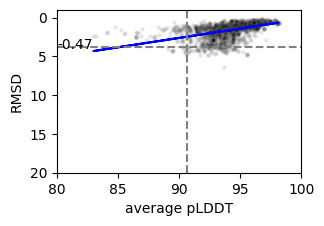

In [75]:
args = {'width_level':1, 'height':6}
fig, ax = Layout(args).one()

chain_type = 'H'
PlotPredict(df).dot_plddt_rmsd(ax, chain_type)

figure size: 8.5 x 6 cm
intercept=11.423475011929131, coef=-0.10413159190696757
94.392385
3.2005


<Axes: xlabel='average pLDDT', ylabel='RMSD'>

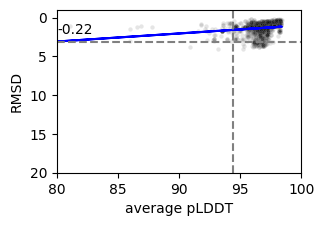

In [76]:
args = {'width_level':1, 'height':6}
fig, ax = Layout(args).one()

chain_type = 'K'
PlotPredict(df).dot_plddt_rmsd(ax, chain_type)

figure size: 8.5 x 6 cm
intercept=17.704973763736223, coef=-0.16432333194869095
92.565265
4.323999999999999


<Axes: xlabel='average pLDDT', ylabel='RMSD'>

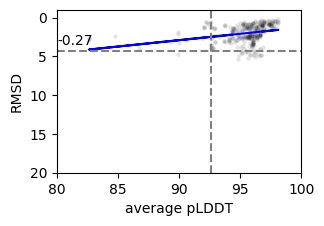

In [77]:
args = {'width_level':1, 'height':6}
fig, ax = Layout(args).one()

chain_type = 'L'
PlotPredict(df).dot_plddt_rmsd(ax, chain_type)

## TM

In [3]:
query = "select * from chain_tmalign where tm1 is not null"
df = QueryComplex(True).list_data(query, True)
df.head()

INFO:mysql.connector:package: mysql.connector.plugins
INFO:mysql.connector:plugin_name: caching_sha2_password
INFO:mysql.connector:AUTHENTICATION_PLUGIN_CLASS: MySQLCachingSHA2PasswordAuthPlugin


,pdb_id,chain_id,tm1,tm2,rmsd,chain_status,native_pdb,model_pdb
0,3IJH,3IJH_0_A_0,0.9869,0.9869,0.63,Fixed,meta_chain_relaxed/3I/3IJH/3IJH_0_A_0/fixed.pdb,chain_alphafold/3I/3IJH/3IJH_0_A_0/3IJH_0_A_0_...
1,3IJH,3IJH_0_B_0,0.9829,0.9829,0.94,Fixed,meta_chain_relaxed/3I/3IJH/3IJH_0_B_0/fixed.pdb,chain_alphafold/3I/3IJH/3IJH_0_B_0/3IJH_0_B_0_...
2,3IJH,3IJH_0_C_0,0.9908,0.9908,0.53,Fixed,meta_chain_relaxed/3I/3IJH/3IJH_0_C_0/fixed.pdb,chain_alphafold/3I/3IJH/3IJH_0_A_0/3IJH_0_A_0_...
3,3IJH,3IJH_0_D_0,0.9857,0.9857,0.85,Fixed,meta_chain_relaxed/3I/3IJH/3IJH_0_D_0/fixed.pdb,chain_alphafold/3I/3IJH/3IJH_0_B_0/3IJH_0_B_0_...
4,9IJS,9IJS_0_A_0,0.9016,0.9016,1.98,Fixed,meta_chain_relaxed/9I/9IJS/9IJS_0_A_0/fixed.pdb,chain_alphafold/9I/9IJS/9IJS_0_A_0/9IJS_0_A_0_...


figure size: 11.4 x 7 cm


/home/yuan/bio/predict_antibody/src/plot_predict.py:61: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 1)


<Axes: xlabel='PDB Post-processing', ylabel='TM-align'>

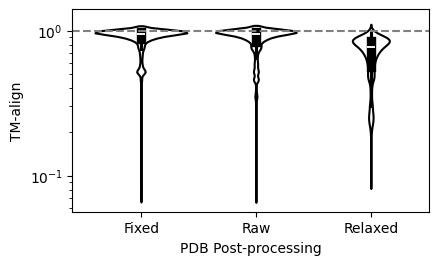

In [13]:
args = {'width_level':2, 'height':7}
fig, ax = Layout(args).one()

PlotPredict(df).violin_pdb_tm(ax)

In [79]:
df = LoadData.plddt_tm()
df.head()

pdb 8737
chains 29089


,chain_id,tm1,rmsd,avg_plddt,allele_name,specie,gene_name,gene_family,chain_type,pdb_id,...,pro_id,chain_seq,pro_len,release_date,structure_method,resolution,avg_bfactor,relative_faa,chain_pdb,pdb_group
0,120L_0_A_0,0.9882,0.52,96.8792,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,220L_0_A_0,0.9872,0.54,96.4314,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3IJJ_0_A_0,0.9976,0.19,98.6847,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3IJJ_0_B_0,0.9975,0.20,98.6843,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3IJJ_0_C_0,0.9974,0.20,98.6843,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


figure size: 8.5 x 6 cm
intercept=-1.2405334441293356, coef=0.02258528458038727
90.633975
0.989


<Axes: xlabel='average pLDDT', ylabel='TM-align'>

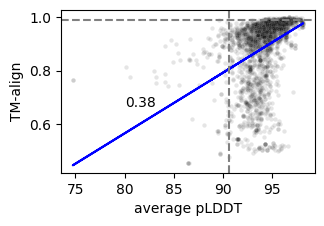

In [87]:
args = {'width_level':1, 'height':6}
fig, ax = Layout(args).one()

chain_type = 'H'
PlotPredict(df).dot_plddt_tm(ax, chain_type)

figure size: 8.5 x 6 cm
intercept=21.461268410483914, coef=-0.21035007837900097
90.633975
3.81


<Axes: xlabel='average pLDDT', ylabel='RMSD'>

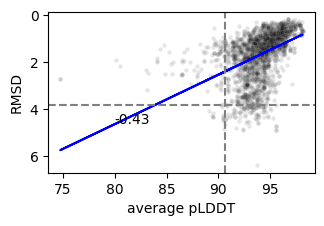

In [91]:
args = {'width_level':1, 'height':6}
fig, ax = Layout(args).one()

chain_type = 'H'
PlotPredict(df).dot_plddt_rmsd2(ax, chain_type)

## figures

In [94]:
df1 = LoadData.plddt_rmsd()
df1.head(2)

pdb 8737
chains 29089


,chain_id,rmsd,avg_plddt,allele_name,specie,gene_name,gene_family,chain_type,pdb_id,model_no,...,pro_id,chain_seq,pro_len,release_date,structure_method,resolution,avg_bfactor,relative_faa,chain_pdb,pdb_group
0,120L_0_A_0,0.520793,96.8792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,220L_0_A_0,0.541288,96.4314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
df2 = LoadData.plddt_tm()
df2.head(2)

pdb 8737
chains 29089


,chain_id,tm1,rmsd,avg_plddt,allele_name,specie,gene_name,gene_family,chain_type,pdb_id,...,pro_id,chain_seq,pro_len,release_date,structure_method,resolution,avg_bfactor,relative_faa,chain_pdb,pdb_group
0,120L_0_A_0,0.9882,0.52,96.8792,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,220L_0_A_0,0.9872,0.54,96.4314,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


figure size: 17.4 x 6 cm
intercept=24.185313288293464, coef=-0.22691693633409704
83.62492
11.70575999999999
intercept=-0.820419424279585, coef=0.01815801657134643
83.73836
0.992


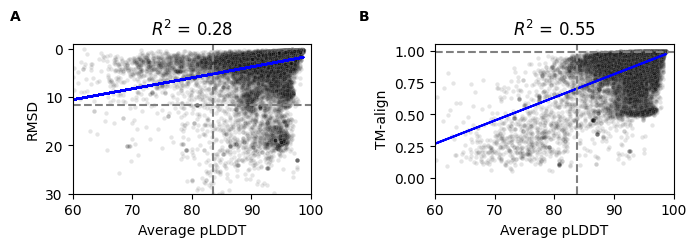

In [134]:
args = {'width_level':3, 'height':6, 'space':.1}
label_x = (-45, -55)
label_y = 25
fig, axes = Layout(args).row(label_x, label_y)

PlotPredict(df1).dot_plddt_rmsd(axes[0])
PlotPredict(df2).dot_plddt_tm(axes[1])

fig.savefig('../figures/eval_predict_monomer.tif', dpi=300, bbox_inches='tight', pad_inches=.05)